## Transit Priority

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import folium
from folium import Choropleth

### Adding Vulnerability to Bus Metrics Analysis

To evaluate the relationship between transit service provision and community needs, the Transit Vulnerability Index (TVI) was spatially joined with bus network data aggregated by census tracts. This integration enabled a deeper analysis of how key transit metrics—such as frequency, headway, and ridership—align with areas of heightened social vulnerability.

In [2]:
#Import Data:
peak_metrics_network = gpd.read_file("Data/peak_metrics_network.geojson")
vulnerability = gpd.read_file("Data/vulnerability.geojson")
bus_network_philadelphia = gpd.read_file("Data/bus_network_philadelphia.geojson")

In [3]:
peak_metrics_network = peak_metrics_network.to_crs("EPSG: 2272")
vulnerability = vulnerability.to_crs("EPSG: 2272")

# Rename columns in the GeoDataFrames to avoid conflicts
if 'index_left' in peak_metrics_network.columns or 'index_right' in peak_metrics_network.columns:
    peak_metrics_network = peak_metrics_network.rename(columns={'index_left': 'pm_index_left', 'index_right': 'pm_index_right'})

if 'index_left' in vulnerability.columns or 'index_right' in vulnerability.columns:
    vulnerability = vulnerability.rename(columns={'index_left': 'vul_index_left', 'index_right': 'vul_index_right'})

# Perform the spatial join
final_segments = gpd.sjoin(
    peak_metrics_network,  
    vulnerability,         
    how="left",            
    predicate="intersects")

# Convert back to CRS
final_segments = final_segments.to_crs("EPSG: 4326")
final_segments = final_segments.sort_values(by='Social_Vulnerability_Index', ascending=False)
final_segments.head()

pm_index_right  stop_id  bus_arrivals  frequency   headway  \
16654          4767.0  15973.0          46.0  15.333333  3.913043   
16443          4806.0  16894.0          25.0   8.333333  7.200000   
27967          4828.0  31460.0          25.0   8.333333  7.200000   
16407          4823.0  16892.0          25.0   8.333333  7.200000   
27968          4828.0  31460.0          25.0   8.333333  7.200000   

                        stop_name   stop_lat   stop_lon  location_type  \
16654      Broad St & Wyoming Av   40.024676 -75.147927            NaN   
16443  Germantown Av & Windrim Av  40.022719 -75.158881            NaN   
27967  Germantown Av & Berkley St  40.023818 -75.159409            NaN   
16407   Germantown Av & Dennie St  40.020448 -75.156774            NaN   
27968  Germantown Av & Berkley St  40.023818 -75.159409            NaN   

       parent_station  ...  name10  n_veryhigh    year  hsi_score hei_score  \
16654             NaN  ...   280.0         1.0  2023.0   6.741606  0.974944   
16443             NaN  ...   280.0         1.0  2023.0   6.741606  0.974944   
27967             NaN  ...   280.0         1.0  2023.0   6.741606  0.974944   
16407             NaN  ...   280.0         1.0  2023.0   6.741606  0.974944   
27968             NaN  ...   280.0         1.0  2023.0   6.741606  0.974944   

       hvi_score objectid   Shape__Area  Shape__Length  \
16654   4.672679    344.0  1.226439e+06    4682.828235   
16443   4.672679    344.0  1.226439e+06    4682.828235   
27967   4.672679    344.0  1.226439e+06    4682.828235   
16407   4.672679    344.0  1.226439e+06    4682.828235   
27968   4.672679    344.0  1.226439e+06    4682.828235   

      Social_Vulnerability_Index  
16654                        6.0  
16443                        6.0  
27967                        6.0  
16407                        6.0  
27968                        6.0  

[5 rows x 49 columns]

### Vulnerability on the bus network

We have generated a map to visualize transit rider vulnerability across the bus network, integrating the Social Vulnerability Index (SVI) to highlight areas of concern. The analysis reveals that West Philadelphia and North Philadelphia exhibit the highest levels of social vulnerability. 

Text(118.3577266549966, 0.5, 'Latitude')

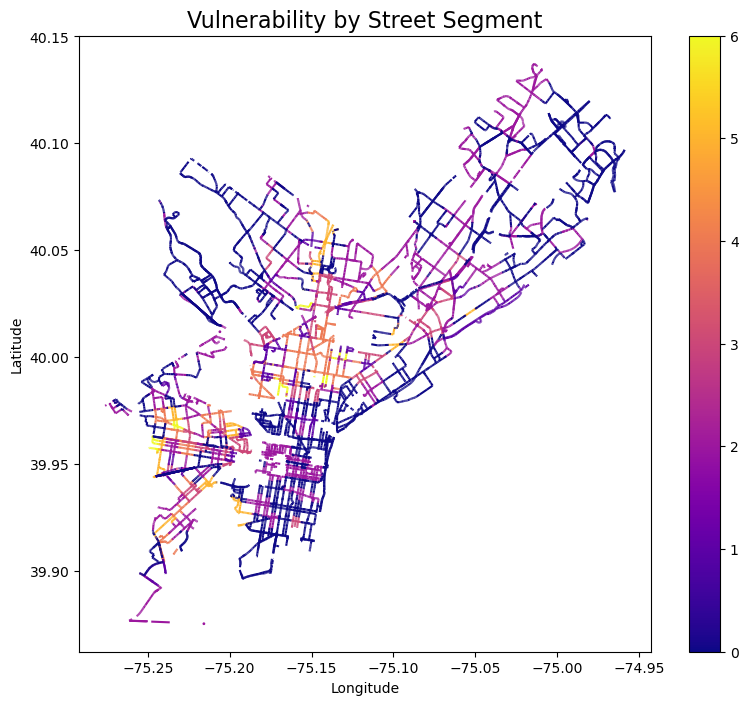

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))
final_segments.plot(
    ax=ax,
    column="Social_Vulnerability_Index",  
    cmap="plasma",        
    legend=True,           
    markersize=1         
)

plt.title("Vulnerability by Street Segment", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

## Criteria for Critical Bus Network Segments Improvements

To prioritize bus transit solutions effectively, we established the following criteria for determining high-priority areas:

    Transit Vulnerability Index: Areas must have a Transit Vulnerability Index (TVI) score of 4 or higher, highlighting significant levels of social vulnerability.

    Headway: Routes with headways under 2 minutes are considered, ensuring focus on high-frequency services where improvements can maximize impact.

    Ridership: Only routes within the upper quartile of ridership are included, reflecting areas of high demand and usage.

These criteria allow us to target interventions where they are most needed, addressing equity, efficiency, and demand in a data-driven manner.

In [5]:
upper_quartile = final_segments["Ridership"].quantile(0.25)

filtered_segments = final_segments[
    (final_segments["Social_Vulnerability_Index"] >= 3) &  
    (final_segments["headway"] < 5) &                    
    (final_segments["Ridership"] >= upper_quartile)]

filtered_segments.head()

pm_index_right  stop_id  bus_arrivals  frequency   headway  \
16654          4767.0  15973.0          46.0  15.333333  3.913043   
16389          4767.0  15973.0          46.0  15.333333  3.913043   
16388          4767.0  15973.0          46.0  15.333333  3.913043   
16386          4767.0  15973.0          46.0  15.333333  3.913043   
16653          4767.0  15973.0          46.0  15.333333  3.913043   

                    stop_name   stop_lat   stop_lon  location_type  \
16654  Broad St & Wyoming Av   40.024676 -75.147927            NaN   
16389  Broad St & Wyoming Av   40.024676 -75.147927            NaN   
16388  Broad St & Wyoming Av   40.024676 -75.147927            NaN   
16386  Broad St & Wyoming Av   40.024676 -75.147927            NaN   
16653  Broad St & Wyoming Av   40.024676 -75.147927            NaN   

       parent_station  ...  name10  n_veryhigh    year  hsi_score hei_score  \
16654             NaN  ...   280.0         1.0  2023.0   6.741606  0.974944   
16389             NaN  ...   280.0         1.0  2023.0   6.741606  0.974944   
16388             NaN  ...   280.0         1.0  2023.0   6.741606  0.974944   
16386             NaN  ...   280.0         1.0  2023.0   6.741606  0.974944   
16653             NaN  ...   280.0         1.0  2023.0   6.741606  0.974944   

       hvi_score objectid   Shape__Area  Shape__Length  \
16654   4.672679    344.0  1.226439e+06    4682.828235   
16389   4.672679    344.0  1.226439e+06    4682.828235   
16388   4.672679    344.0  1.226439e+06    4682.828235   
16386   4.672679    344.0  1.226439e+06    4682.828235   
16653   4.672679    344.0  1.226439e+06    4682.828235   

      Social_Vulnerability_Index  
16654                        6.0  
16389                        6.0  
16388                        6.0  
16386                        6.0  
16653                        6.0  

[5 rows x 49 columns]

#### Visualising the most important segments for improvements:

The segments selected based on the criteria outlined above are concentrated along major streets in Philadelphia, including Broad Street, Market Street, Kensington Avenue, and Roosevelt Boulevard. High ridership on these segments likely reflects passenger transfers from nearby subway stations.

In [6]:
from shapely.geometry import Point

# Re-project to a projected CRS for accurate centroid calculation
projected_segments = filtered_segments.to_crs(epsg=3857)

# Calculate the mean centroid coordinates in the projected CRS
mean_y = projected_segments.geometry.centroid.y.mean()
mean_x = projected_segments.geometry.centroid.x.mean()

# Convert the mean centroid coordinates back to WGS84 for Folium
mean_point = gpd.GeoSeries([Point(mean_x, mean_y)], crs=3857).to_crs(epsg=4326)
mean_lat, mean_lon = mean_point.geometry[0].y, mean_point.geometry[0].x

# Initialize a Folium map centered around the data
m = folium.Map(
    location=[mean_lat, mean_lon],
    zoom_start=11,
    tiles='CartoDB Positron')

# choropleth map for TVI
folium.Choropleth(
    geo_data=vulnerability,
    name="Social Vulnerability Score",
    data=vulnerability,
    columns=["GEOID", "Social_Vulnerability_Index"],
    key_on="feature.properties.GEOID", 
    fill_color="YlOrRd",
    fill_opacity=0.3,
    line_opacity=0.1,
    legend_name="Social Vulnerability Score",
).add_to(m)

folium.GeoJson(
    bus_network_philadelphia,
    style_function=lambda x: {"color": "grey", "weight": 0.5, "opacity": 0.4},
    name="Bus Network (Philadelphia)"
).add_to(m)

folium.GeoJson(
    filtered_segments,
    style_function=lambda x: {"color": "blue", "weight": 3, "opacity": 1},
    name="Filtered Segments"
).add_to(m)

folium.LayerControl().add_to(m)

m

The table below showcases the top 10 bus segments ranked by ridership. These segments represent the busiest parts of the network, where high passenger volumes underscore their critical role in Philadelphia's transit system. Prioritizing improvements in these areas is essential to enhance service reliability and meet the needs of the city's most active transit users. By focusing on these high-demand corridors, transit agencies can address existing inefficiencies and better align services with the needs of vulnerable communities. 

In [7]:
# Sort the GeoDataFrame by the 'headway' column in ascending order
filtered_segments = filtered_segments.sort_values(by='headway', ascending=True)

# Group by 'stop_name' and calculate aggregate values for the selected columns
final_streets = (
    filtered_segments.groupby("stop_name")[["headway", "frequency", "Ridership", "Social_Vulnerability_Index"]]
    .mean() 
    .reset_index())

final_streets.rename(columns={"Social_Vulnerability_Index": "Transit_Rider_Vulnerability_Index"}, inplace=True)
final_streets = final_streets.sort_values(by='Ridership', ascending=False)
final_streets.head(10)

stop_name   headway  frequency  Ridership  \
10    Arrott Transportation Center  2.903226  20.666667     1550.0   
1        23rd St & Venango St Loop  1.855670  32.333333     1503.0   
26        Broad St & Olney Av - FS  3.750000  16.000000      825.0   
63  Roosevelt Blvd & Broad St - FS  3.913043  15.333333      666.0   
30             Broad St & Tabor Rd  3.461538  17.333333      665.0   
47             Market St & 40th St  4.090909  14.666667      575.0   
2        33rd St & Dauphin St Loop  4.864865  12.333333      536.0   
35     Frankford Av & Margaret St   3.529412  17.000000      492.0   
73           Woodland Av & 50th St  3.600000  16.666667      481.0   
18         Broad St & Allegheny Av  3.471429  17.333333      415.0   

    Transit_Rider_Vulnerability_Index  
10                           3.000000  
1                            4.000000  
26                           3.750000  
63                           3.000000  
30                           3.285714  
47                           3.000000  
2                            4.000000  
35                           3.000000  
73                           5.000000  
18                           4.000000